#3 Linear Models for Regression

##3.1 Linear Basis Function Models

###Polynomial Basis Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
def polynomial_basis(x, degree):
  """
  x:      1D array - inputs
  degree: int - degree of the polynomial
  output: ndarray - basis
  """
  return np.array([x**i for i in range(degree)]).T

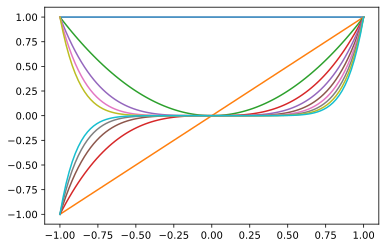

In [3]:
degree = 10
phi_polynomial = polynomial_basis(np.linspace(-1, 1, 100), degree=degree)
for d in range(degree):
  plt.plot(np.linspace(-1, 1, 100), phi_polynomial[:,d])

###Gaussian Basis Function

In [4]:
def gaussian_basis(x, mus=[0], scale=.1):
  """
  x:      1D array - inputs
  mu:     int or list - locations of basis functions
  scale:  list or 1D array - scale of basis functions
  output: ndarray - basis
  """
  return np.array([np.exp(-(x-mu)**2/(2*scale**2)) for mu in mus]).T

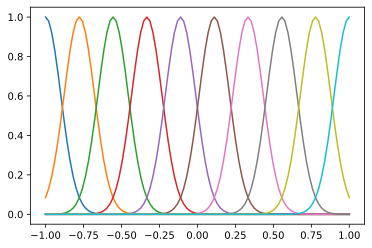

In [5]:
mus = np.linspace(-1, 1, 10)
phi_gaussian = gaussian_basis(np.linspace(-1, 1, 100), mus=mus)
for mu in range(len(mus)):
  plt.plot(np.linspace(-1, 1, 100), phi_gaussian[:,mu])

###Sigmoidal Basis Function

In [6]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoidal_basis(x, mus=[0], scale=.1):
  """
  x:      1D array - inputs
  mu:     list or 1D array - locations of basis functions
  scale:  int - scale of basis functions
  output: ndarray - basis
  """
  return np.array([sigmoid((x-mu)/scale) for mu in mus]).T

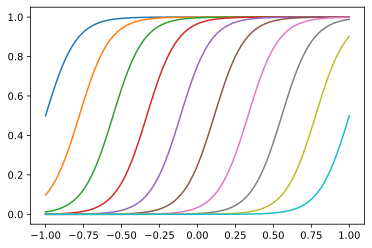

In [7]:
mus = np.linspace(-1, 1, 10)
phi_sigmoidal = sigmoidal_basis(np.linspace(-1, 1, 100), mus=mus)
for mu in range(len(mus)):
  plt.plot(np.linspace(-1, 1, 100), phi_sigmoidal[:,mu])

###3.1.2 Geometry of least squares

In [8]:
def regularization_contours(q=2):
  """
  q: int - power of the term (|w|**q)
  output: plot of the regularization as a function of q
  """
  w = np.linspace(-1, 1, 100)
  E_w = np.zeros((100,100))
  for i, item in enumerate(w):
    for j, item in enumerate(w):
      E_w[i,j] = np.abs(w[i])**q + np.abs(w[j])**q
  plt.axhline(50,color='black') # x = 0
  plt.axvline(50,color='black') # y = 0
  plt.contour(E_w, levels=1, colors="g")
  plt.gca().set_aspect('equal', adjustable='box')
  plt.xticks([])
  plt.yticks([])

Text(0.5, 0, 'q=4')

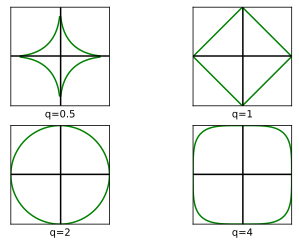

In [12]:
plt.subplot(221); regularization_contours(0.5); plt.xlabel("q=0.5")
plt.subplot(222); regularization_contours(1);   plt.xlabel("q=1")
plt.subplot(223); regularization_contours(2);   plt.xlabel("q=2")
plt.subplot(224); regularization_contours(4);   plt.xlabel("q=4")